# Coin Tosses and Updates of Posterior 
--- 
---
### Bayesian Updating with Conjugate Priors Using Bernoulli Random Variables (Binary)
- Binomial Random Variable: number of successes in 'n' independent successive trials of a Bernoulli Experiment
#### [GitHub](https://github.com/PacktPublishing/Machine-Learning-for-Algorithmic-Trading-Second-Edition/blob/master/10_bayesian_machine_learning/01_updating_conjugate_priors.ipynb)
---
---

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.ticker import FuncFormatter

In [3]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [4]:
np.random.seed(42)
sns.set_style('dark')

## Formatting Helper

In [5]:
def format_plot(axes, i, p, y, trials, success, true_p, tmle, tmap=None):
    ''' 
    
    p = theta range
    y = updated data
    trials = trials from experiment list
    success = heads
    true_p = true probability of 50% (either success or failure)
    tmle = theta MLE = Mean of Successes 
    tmap = theta MAP = Series Dataframe of Updated Data
    
    '''
    fmt = FuncFormatter(lambda x, _: f'{x:.0%}')
    
    if i >= 6:
        axes[i].set_xlabel("$p$, Success Probability")
        axes[i].xaxis.set_major_formatter(fmt)
    else:
        axes[i].axes.get_xaxis().set_visible(False)
    
    if i % 3 == 0:
        axes[i].set_ylabel("Posterior Probability")
    
    
    axes[i].set_yticks([])

    axes[i].plot(p, y, lw=1, c='k')
    
    axes[i].fill_between(p, y, color='darkblue', alpha=0.4)
    axes[i].vlines(true_p, 0, max(10, np.max(y)), color='k', linestyle='--', lw=1)
    axes[i].set_title(f'Trials: {trials:,d} - Success: {success:,d}')
    
    
    if i > 0:
        smle = r"$\theta_{{\mathrm{{MLE}}}}$ = {:.2%}".format(tmle)
        axes[i].text(x=.02, y=.85, s=smle, transform=axes[i].transAxes)
        smap = r"$\theta_{{\mathrm{{MAP}}}}$ = {:.2%}".format(tmap)
        axes[i].text(x=.02, y=.75, s=smap, transform=axes[i].transAxes)    
    
    
    return axes[i]

## Simulate Coin Tosses and Updates of Posterior 

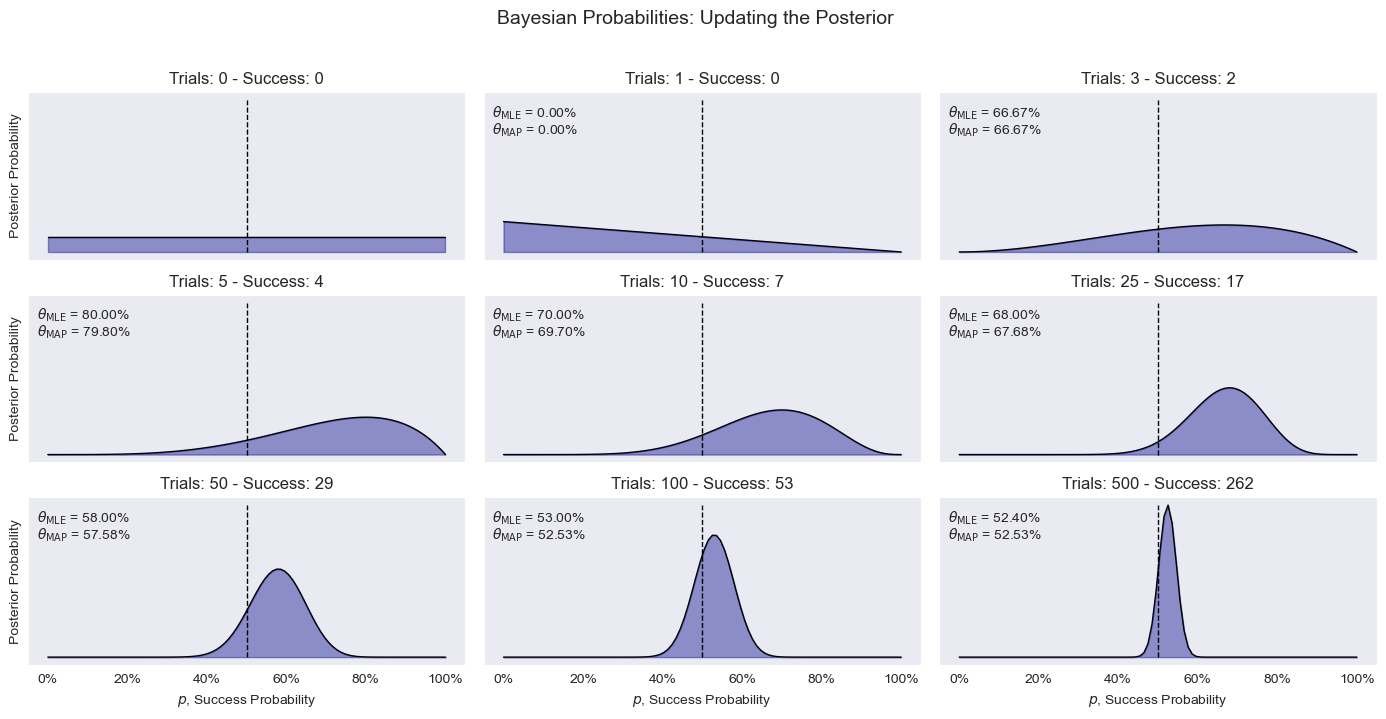

In [8]:
n_trials = [0, 1, 3, 5, 10, 25, 50, 100, 500]
outcomes = stats.bernoulli.rvs(p=0.5, size=n_trials[-1])
p = np.linspace(0, 1, 100)
# uniform (uninformative) prior
a = b = 1

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 7), sharex=True)
axes = axes.flatten()
fmt = FuncFormatter(lambda x, _: f'{x:.0%}')
for i, trials in enumerate(n_trials):
    successes = outcomes[:trials]
    theta_mle = np.mean(successes)
    heads = sum(successes)
    tails = trials - heads
    update = stats.beta.pdf(p, a + heads , b + tails)
    theta_map = pd.Series(update, index=p).idxmax()
    axes[i] = format_plot(axes, i, p, update, trials=trials, success=heads, 
                          true_p=.5, tmle=theta_mle, tmap=theta_map)

title = 'Bayesian Probabilities: Updating the Posterior'
fig.suptitle(title,  y=1.02, fontsize=14)
fig.tight_layout()

plt.show()